do Problems: Experiment, Steady States, Adaptive and Sensitivity


In [2]:
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np


class Integ61(Integrator):
   
    def __init__(self, coeff_file_name,initvars=None,uservars=None,
                timevars=None):
        super().__init__(coeff_file_name)
        self.set_yinit(initvars,uservars,timevars)
        
    def set_yinit(self,initvars,uservars,timevars):
        #
        # read in 'sigma beta rho', override if uservars not None
        #
        if uservars:
            self.config['uservars'].update(uservars)
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'x y z'
        #
        if initvars:
            self.config['initvars'].update(initvars)
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        #
        # set dt, tstart, tend if overiding base class values
        #
        if timevars:
            self.config['timevars'].update(timevars)
            timevars = namedtuple('timevars', self.config['timevars'].keys())
            self.timevars = timevars(**self.config['timevars'])
        self.yinit = np.array(
            [self.initvars.x, self.initvars.y, self.initvars.z])
        self.nvars = len(self.yinit)
    
    def derivs5(self, coords, t):
        x,y,z = coords
        u=self.uservars
        f=np.empty_like(coords)
        f[0] = u.sigma * (y - x)
        f[1] = x * (u.rho - z) - y
        f[2] = x * y - u.beta * z
        return f

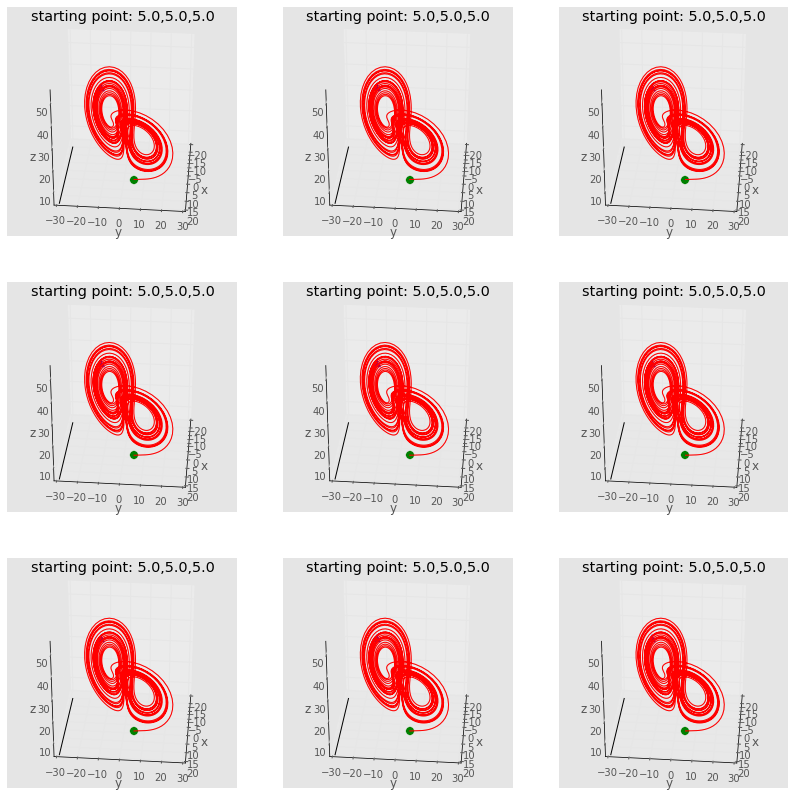

In [13]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

def plot_3d(ax,xvals,vals,zvals):
    """
        plot a 3-d trajectory with start and stop markers
    """
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.set_xlim((-20, 20))
    ax.set_ylim((-30, 30))
    ax.set_zlim((5, 55))
    ax.grid(True)
    #
    # look down from 30 degree elevation and an azimuth of
    #
    ax.view_init(30,5)
    line,=ax.plot(xvals,yvals,zvals,'r-')
    ax.plot([-20,15],[-30,-30],[0,0],'k-')
    ax.scatter(xvals[0],yvals[0],zvals[0],marker='o',c='green',s=75)
    ax.scatter(xvals[-1],yvals[-1],zvals[-1],marker='^',c='blue',s=75)
    out=ax.set(xlabel='x',ylabel='y',zlabel='z')
    line.set(alpha=0.2)
    return ax

# make a nested dictionary to hold parameters
#
timevars=dict(tstart=0,tend=27,dt=0.01)
uservars=dict(sigma=10,beta=2.6666,rho=28)
initvars=dict(x=5,y=5,z=5)
params=dict(timevars=timevars,uservars=uservars,initvars=initvars)
#

fig = plt.figure(figsize=(14,14))
file_list = ['lorenz.yaml','lorenz2.yaml','lorenz3.yaml','lorenz4.yaml','lorenz5.yaml','lorenz6.yaml','lorenz7.yaml','lorenz8.yaml','lorenz9.yaml']
for i in range(1,10):
    theSolver = Integ61(file_list[i-1],**params)
    timevals, coords, errorlist = theSolver.timeloop5fixed()
    xvals,yvals,zvals=coords[:,0],coords[:,1],coords[:,2]
# top figure
    ax = fig.add_subplot(3,3,i, projection='3d')
    ax=plot_3d(ax,xvals,yvals,zvals)
    out=ax.set(title='starting point: {},{},{}'.format(*coords[0,:]))
    
plt.show()